# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,10)

# importing dataset

In [2]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
data.shape

(5110, 12)

# Handling Missing Data

In [8]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [9]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [10]:
data['bmi'].isnull().sum()

0

# Feature Generation

In [12]:
data.drop('id',axis=1,inplace=True)

In [13]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


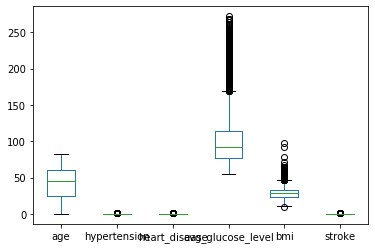

In [14]:
data.plot(kind='box')

plt.show()

In [16]:
data['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  5110 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


# Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()

In [20]:
gender=la.fit_transform(data['gender'])

In [21]:
smoking_status=la.fit_transform(data['smoking_status'])

In [22]:
ever_married=la.fit_transform(data['ever_married'])
work_type=la.fit_transform(data['work_type'])
Residence_type=la.fit_transform(data['Residence_type'])

In [23]:
data['ever_married']=ever_married
data['Residence_type']=Residence_type
data['work_type']=work_type
data['gender']=gender
data['smoking_status']=smoking_status

In [24]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
gender               5110 non-null int32
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null int32
work_type            5110 non-null int32
Residence_type       5110 non-null int32
avg_glucose_level    5110 non-null float64
bmi                  5110 non-null float64
smoking_status       5110 non-null int32
stroke               5110 non-null int64
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


# Partitioning

In [27]:
x=data.drop('stroke',axis=1)
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [28]:
y=data['stroke']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=None)

In [30]:
x_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2952,1,34.0,0,0,0,0,1,72.75,22.2,0
4722,0,78.0,1,0,1,3,0,152.38,31.8,2
4998,0,24.0,0,0,1,2,0,67.99,32.1,2
2042,1,8.0,0,0,0,4,1,104.51,20.6,0
4818,0,44.0,0,0,1,2,0,60.02,33.8,1
...,...,...,...,...,...,...,...,...,...,...
2695,0,50.0,0,0,1,2,1,65.98,21.7,2
3051,0,10.0,0,0,0,4,0,84.86,28.6,2
1859,0,78.0,0,0,1,0,1,58.88,35.8,0
3050,1,61.0,0,0,0,2,0,140.07,29.5,2


In [31]:
x_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3228,1,54.0,0,0,1,2,1,85.81,21.7,1
4504,1,60.0,0,0,1,0,0,203.27,29.7,2
866,0,20.0,0,0,0,2,1,112.96,27.5,2
4725,0,46.0,0,0,1,2,0,106.47,27.2,0
1899,0,27.0,0,0,0,2,0,83.26,22.2,2
...,...,...,...,...,...,...,...,...,...,...
4368,0,40.0,0,0,1,2,1,101.06,32.3,3
2202,1,73.0,0,1,1,0,0,70.23,28.1,2
1154,0,21.0,0,0,0,2,1,112.07,28.2,2
4636,0,48.0,0,0,1,3,1,212.19,46.9,2


In [32]:
y_train

2952    0
4722    0
4998    0
2042    0
4818    0
       ..
2695    0
3051    0
1859    0
3050    0
1930    0
Name: stroke, Length: 4088, dtype: int64

In [33]:
y_test

3228    0
4504    0
866     0
4725    0
1899    0
       ..
4368    0
2202    0
1154    0
4636    0
3995    0
Name: stroke, Length: 1022, dtype: int64

# Normalize

In [35]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [36]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [37]:
x_train_std=std.fit_transform(x_train)

In [38]:
x_test_std=std.transform(x_test)

In [39]:
x_train_std

array([[ 1.19059095, -0.40345483, -0.33160926, ..., -0.73981654,
        -0.87193356, -1.2890198 ],
       [-0.83822764,  1.5609714 ,  3.01559731, ...,  1.00328965,
         0.35921782,  0.58059629],
       [-0.83822764, -0.84991533, -0.33160926, ..., -0.84401327,
         0.3976913 ,  0.58059629],
       ...,
       [-0.83822764,  1.5609714 , -0.33160926, ..., -1.04343179,
         0.87219756, -1.2890198 ],
       [ 1.19059095,  0.80198854, -0.33160926, ...,  0.7338229 ,
         0.06425447,  0.58059629],
       [-0.83822764,  1.06986485, -0.33160926, ..., -0.5353633 ,
        -1.91071753,  0.58059629]])

# Training

## Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [75]:
dt.fit(x_train_std,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [76]:
dt.feature_importances_

array([0.02685136, 0.18992298, 0.05094005, 0.02703947, 0.01134662,
       0.03002291, 0.02811731, 0.3129988 , 0.22261382, 0.1001467 ])

In [77]:
x_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [137]:
y_pred_dt=dt.predict(x_test_std)

In [138]:
y_test

3228    0
4504    0
866     0
4725    0
1899    0
       ..
4368    0
2202    0
1154    0
4636    0
3995    0
Name: stroke, Length: 1022, dtype: int64

In [139]:
x_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3228,1,54.0,0,0,1,2,1,85.81,21.7,1
4504,1,60.0,0,0,1,0,0,203.27,29.7,2
866,0,20.0,0,0,0,2,1,112.96,27.5,2
4725,0,46.0,0,0,1,2,0,106.47,27.2,0
1899,0,27.0,0,0,0,2,0,83.26,22.2,2
...,...,...,...,...,...,...,...,...,...,...
4368,0,40.0,0,0,1,2,1,101.06,32.3,3
2202,1,73.0,0,1,1,0,0,70.23,28.1,2
1154,0,21.0,0,0,0,2,1,112.07,28.2,2
4636,0,48.0,0,0,1,3,1,212.19,46.9,2


In [142]:
from sklearn.metrics import accuracy_score
ac_dt=accuracy_score(y_test,y_pred_dt)

In [143]:
ac_dt

0.9050880626223092

# Logistic Regression

In [144]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [145]:
lr.fit(x_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [146]:
y_pred_lr=lr.predict(x_test_std)

In [147]:
ac_lr=accuracy_score(y_test,y_pred_lr)

In [148]:
ac_lr

0.9569471624266145

# KNN

In [149]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [150]:
knn.fit(x_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [151]:
y_pred_knn=knn.predict(x_test_std)

In [152]:
ac_knn=accuracy_score(y_test,y_pred_knn)

In [153]:
ac_knn

0.9481409001956947

# Random Forest

In [154]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()


In [155]:
rf.fit(x_train_std,y_train)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [156]:
y_pred_rf=rf.predict(x_test_std)

In [157]:
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [158]:
ac_rf=accuracy_score(y_test,y_pred_rf)

In [159]:
ac_rf

0.9540117416829745

# SVM

In [160]:
from sklearn.svm import SVC

In [161]:
sv=SVC()

In [162]:
sv.fit(x_train_std,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [163]:
y_pred_sv=sv.predict(x_test_std)

In [164]:
y_pred_sv

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [165]:
ac_svc=accuracy_score(y_test,y_pred_sv)

In [166]:
ac_svc

0.9569471624266145

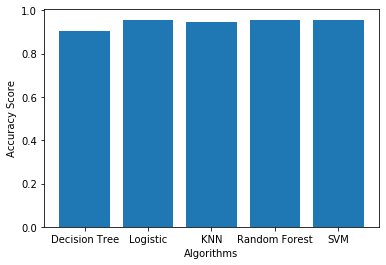

In [167]:
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM'],[ac_dt,ac_lr,ac_knn,ac_rf,ac_svc])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.show()

In [171]:
import pickle
model= r'C:\Users\vaibhav\Project\Finalized_model_lr.sav'
pickle.dump(lr, open(model,'wb'))